![../docs/images/banner-small.png](../docs/images/banner-small.png)

In [1]:
%matplotlib widget
import sys
sys.path.append('../')
from invertedai_drive import iai, Config, Jupyter_Render
import numpy as np
import cv2
from IPython.display import clear_output
clear_output()

Jupyter_Render(children=(HBox(children=(Play(value=0, description='Press play', max=0), IntSlider(value=0, des…

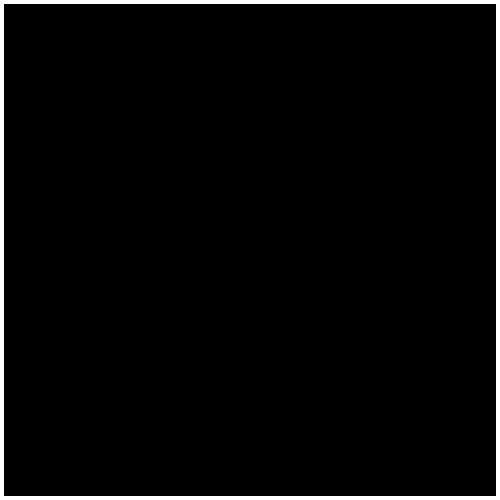

In [4]:


simulation_lenght = 30
renderer = Jupyter_Render()
display(renderer)

In [5]:
# drive = iai()
iai.api_key=""
iai.location="CARLA:Town03:Roundabout"
iai.agent_count=10
iai.batch_size=1
iai.obs_length=1
iai.step_times=1
iai.min_speed=10
iai.max_speed=20


response = iai.initialize()
agent_attributes = response["attributes"]
frames = []
for t in range(simulation_lenght):
    response = iai.run(
        agent_attributes=agent_attributes,
        states=response["states"],
        recurrent_states=response["recurrent_states"],
        return_birdviews=True,
    )
    birdview = cv2.imdecode(np.array(response["bird_view"], dtype=np.uint8), cv2.IMREAD_COLOR)
    renderer.add_frame(birdview)